1033.3333333333333
1033.3333333333333
[1241.83860323]
[39.01714496] -709.0186449535477


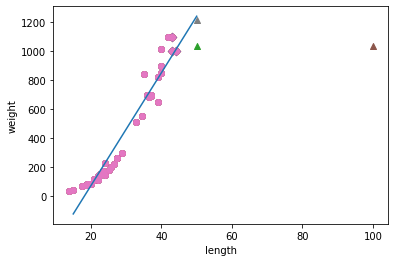

0.939846333997604
0.8247503123313558
(42, 2) (14, 2)

 50cm 농어에 대한 예측
[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827

 50cm 농어 데이터


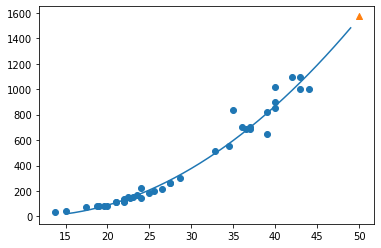


 훈련 세트와 테스트 세트를 평가합니다.
0.9706807451768623
0.9775935108325122


In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# 훈련 세트와 테스트 세트로 나눕니다.
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

#k-최근접 이웃 참고 설정을 3개로 함
knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)
# print(knr.predict([[50]]))

# 50cm 농어의 이웃을 구합니다
distances, indexes =  knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show

print(np.mean(train_target[indexes]))

# 100cm 농어의 이웃을 구합니다
distances, indexes =  knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show

print(np.mean(train_target[indexes]))

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련합니다.
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측합니다.
print(lr.predict([[50]]))

# 선형 회기의 기울기와 
print(lr.coef_, lr.intercept_)

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1214.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 훈련 세트와 테스트 세트에 대한 R제곱 점수를 확인하겠습니다.
print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target))   # 테스트 세트

# 2차 방정식 그래프를 그리려고 하면 길이를 제곱한 항이 훈련세트에 추가되어야합니다
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

# 변경된 훈련세트로 다시 선형 회귀 모델 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)
# 50cm 농어에 대한 에측

print("\n 50cm 농어에 대한 예측")
print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

# 직선을 아주 조금씩 잘라서 그린 그래프
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)

# 훈련 세트으 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다.
plt.plot(point, 1.01 * point ** 2 - 21.6 * point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
print("\n 50cm 농어 데이터")
plt.show()

# 훈련 세트와 테스트 세트를 평가합니다.
print("\n 훈련 세트와 테스트 세트를 평가합니다.")
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))